# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/seyda/Desktop/Data Immersion/Achivement 6'

In [5]:
df = pd.read_csv(os.path.join(path, 'prepared_data','cleaned_medical.csv'))

# 2 . Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges', 'smoker_cat'],
      dtype='object')

In [7]:
df.drop(columns = ['Unnamed: 0'])

,age,sex,bmi,children,smoker,region,charges,smoker_cat
0,19,female,27.900,0,yes,Southwest,16884.92400,1.0
1,18,male,33.770,1,no,Southeast,1725.55230,0.0
2,28,male,33.000,3,no,Southeast,4449.46200,0.0
3,33,male,22.705,0,no,Northwest,21984.47061,0.0
4,32,male,28.880,0,no,Northwest,3866.85520,0.0
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,Northwest,10600.54830,0.0
1333,18,female,31.920,0,no,Northeast,2205.98080,0.0
1334,18,female,36.850,0,no,Southeast,1629.83350,0.0
1335,21,female,25.800,0,no,Southwest,2007.94500,0.0


In [8]:
df.shape

(1337, 9)

## Missing values

In [10]:
df.isnull().sum()
# No missing values to handle

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
smoker_cat    0
dtype: int64

## Duplicate check

In [11]:
dups = df.duplicated()

In [15]:
dups.shape # No diplicates

(1337,)

## Extreme values check

/Users/seyda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

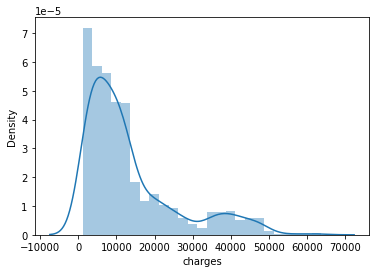

In [19]:
sns.distplot(df['charges'], bins=25) # Shows extreme values

# Some of the outliers in the high values need to be removed. But try it later.

In [21]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

# 3. Data prep for regression analysis

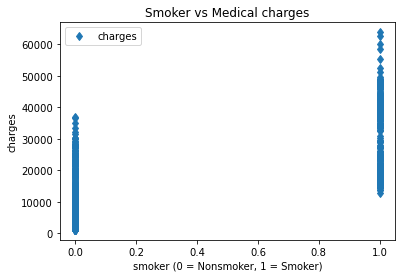

In [50]:
# Exploring 'smoker vs charges' by using scatterplot
df.plot(x = 'smoker_cat', y='charges', style = 'd') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Smoker vs Medical charges')  
plt.xlabel('smoker (0 = Nonsmoker, 1 = Smoker)')  
plt.ylabel('charges')  
plt.show()

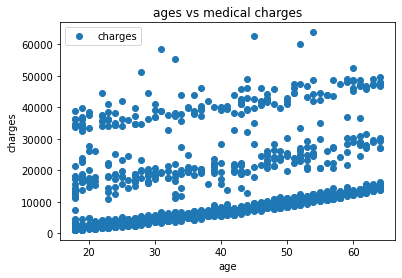

In [33]:
# Exploring 'age vs charges' by using scatterplots
df.plot(x = 'age', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ages vs medical charges')  
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()

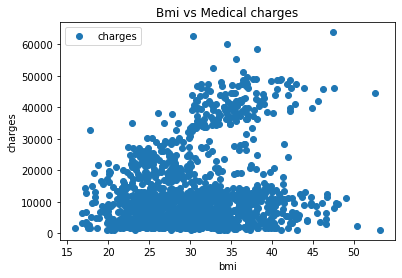

In [55]:
# Exploring 'bmi vs charges' by using scatterplots
df.plot(x = 'bmi', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Bmi vs Medical charges')  
plt.xlabel('bmi')  
plt.ylabel('charges')  
plt.show()

# 4. Hypothesis : ' Smokers pay more for the medical'.

# 5. Reshape and split the variables

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['smoker_cat'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [42]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

# 6. Regression analysis

In [43]:
# Create a regression object
regression = LinearRegression()

In [44]:
# Fit the regression to the train set
regression.fit( X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

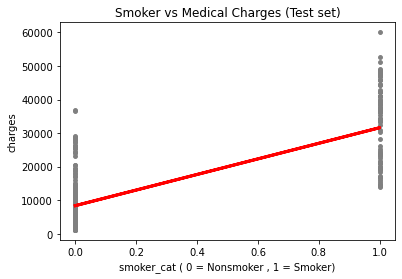

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Smoker vs Medical Charges (Test set)')
plot_test.xlabel('smoker_cat ( 0 = Nonsmoker , 1 = Smoker)')
plot_test.ylabel('charges')
plot_test.show()

I assume that smokers pay more based on the scatterplot line.

# 7. Check the model performance statistics

In [51]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [52]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[23220.4579549]]
Mean squared error:  63647586.63377627
R2 score:  0.6113351239111662


# 8. Compare the predicted y values with the actual y values

In [54]:
# Create a dataframe comparing the real and the predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,1633.96180,8393.809770
1,8547.69130,8393.809770
2,9290.13950,8393.809770
3,32548.34050,31614.267724
4,9644.25250,8393.809770
5,2680.94930,8393.809770
6,2198.18985,8393.809770
7,1241.56500,8393.809770
8,2710.82855,8393.809770
9,12235.83920,8393.809770


# R2 value is 0.61, which would indicate that the model fits well . The MSE value is around 63m shows that the model might not be best suited to make accurate predictions. 
# Since the dataset is not large enough, it could 
# Using only smoker category does not determine the medical cost, therefore applying other dependent variables into the model could improve it's predictions. 